In [1]:
import SingleVariableRegression as svr
import numpy as np
from pylab import*

Load data

In [2]:
import pandas as pd
def rf(fn):
    data = pd.read_csv(fn, skiprows=5, sep=' ', header=None, skipinitialspace=True)
    ncol= len(data.columns)-1
    x = data.ix[:,:ncol-1]
    y = data.ix[:,ncol]
    return x,y

# x,y = rf('mvar-set4.dat')
# print x

Map given features to high dimension

In [3]:
import itertools
def combF (x, dim):
    z = x
    lenX = len(z)
    index = np.arange(lenX)
    iterable = itertools.combinations_with_replacement(z,dim)
    for indx in iterable:
        col = 1
        for item in indx:
            col *= z[item]
        lenX += 1
        z[lenX] = col
    z.columns = range(len(z.columns))
    return z

# test = combF(x,2)
# print test

In [28]:
def lmdata(filename, dim =1 ):

    x,y = rf(filename)
    print
    print filename, " :"
    print x.tail(3)
    if dim>1:
        x1 = combF (x, dim)
        print '\n After mapping: '
        print
        print filename, " :"
        print x1.tail(3)
    return x,y
    

In [ ]:
def MultiVari(filename, dim = 1, getFit = False):
    
    #get high dimensional features
    x_p,y_p = rf(filename)
    if getFit:
        for i in range(1,dim+1):
            mapx = combF(x_p, dim)
            x_h = np.asarray(x_p)
            y_h = np.asarray(y_p)
            m_x = np.asarray(mapx)
    
    # get ndarray that z =[1,x]
        z = np.insert(m_x, 0, 1, axis=1)
    
    #get liner regression and compute test error by MSE

        svr.CrossValidation(filename, fit = 1.2,flg = True, ftrs = m_x, lbls = y_h)
        if flg:
            x = ftrs
            y = lbls
            L_MSE = np.zeros(fit)
        L_RSE = np.zeros(fit)
        for i in range(1,fit):
            z = trans_X(x,i)
            pre_P = prediction(z,y,fited = True)
            x_fit = z[:,1:]
            err_M, err_R = data_ERR(x_fit,y)
            L_RSE[i] = err_R
            L_MSE[i] = err_M
        n = np.arange(fit)
        if not flg:
            print ''
            draw(x=n,y=L_RSE,c = 'r.-', title = filename, xlabel = 'Factors of features', ylabel = 'RSE')
        if flg:
            print ''
            draw(x=n,y=L_MSE,c = 'b.-', title = filename, xlabel = 'Factors of features', ylabel = 'MSE')

### (a) Load the multiple feature data sets, and map them to a higher dimensional feature space using combinations of features.

In [29]:
for i in range(1,5):
    filename = "mvar-set"+str(i)+".dat"
    lmdata(filename, 2 )


mvar-set1.dat  :
             0         1
2497 -2.000000 -0.693878
2498 -1.836735  1.020408
2499 -0.285714  1.428571

 After mapping: 

mvar-set1.dat  :
             0         1         2         3         4
2497 -2.000000 -0.693878  4.000000  1.387755  0.481466
2498 -1.836735  1.020408  3.373594 -1.874219  1.041233
2499 -0.285714  1.428571  0.081633 -0.408163  2.040816

mvar-set2.dat  :
             0         1
2497 -1.510204 -1.183673
2498 -0.204082  0.693878
2499  0.938776 -1.102041

 After mapping: 

mvar-set2.dat  :
             0         1         2         3         4
2497 -1.510204 -1.183673  2.280716  1.787589  1.401083
2498 -0.204082  0.693878  0.041649 -0.141608  0.481466
2499  0.938776 -1.102041  0.881299 -1.034569  1.214494

mvar-set3.dat  :
              0         1         2         3         4
99997  1.030317  0.529764  0.217960  1.477808  1.502093
99998  0.304738 -0.204171 -0.532305  1.171884  1.373679
99999 -2.108521 -1.621891  0.386624 -1.336413  2.061276

 After ma

#### Load multiple feature datasets, print the last 3 row of both original and maped high dimension feature values (degree = 2).

### (b)Perform linear regression in the higher dimensional space. Evaluate different mappings in terms of the testing error they produce. Choose a single model and justify your selection. Compute the mean square error when using the training set and when using the testing set.

In [23]:
def MultiVar(filename, dim = 1):
    
    #get high dimensional features
    x_p,y_p = rf(filename)
    if dim>1:
        L_MSE = np.zeros(dim+1)
        for i in range(1,dim+1):
            print 'Dimension: ',i
            mapx = combF(x_p, i)
            x_h = np.asarray(x_p)
            y = np.asarray(y_p)
            x = np.asarray(mapx)

            pre_P = svr.prediction(x,y)
            err_M, err_R = svr.data_ERR(x,y)
            L_MSE[i] = err_M
            print 'chack MSE: ',err_M
        n = np.arange(dim+1)
        print 'x: ', shape(n)
        print 'LMSE ', shape(L_MSE)
        print ''
        svr.draw(x=n,y=L_MSE,c = 'b.-', title = filename, xlabel = 'dimentions', ylabel = 'MSE')

Dimension:  1
chack MSE:  0.25870289035
Dimension:  2
chack MSE:  0.258256248391
x:  (3L,)
LMSE  (3L,)



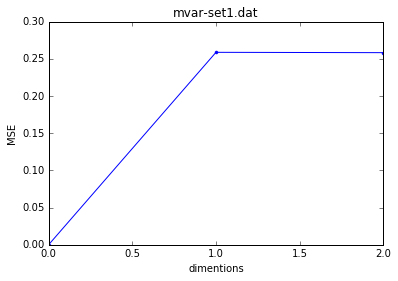

Dimension:  1
chack MSE:  0.0199118763348
Dimension:  2
chack MSE:  0.0199095053892
x:  (3L,)
LMSE  (3L,)



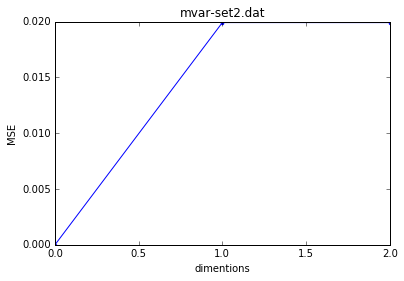

Dimension:  1
chack MSE:  0.250743137798
Dimension:  2
chack MSE:  0.251858027857
x:  (3L,)
LMSE  (3L,)



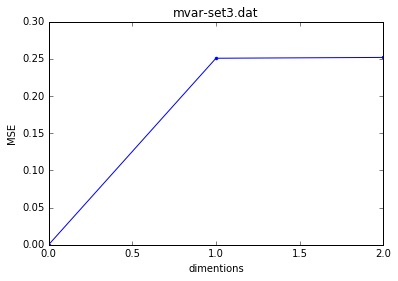

Dimension:  1
chack MSE:  0.00418917124746
Dimension:  2
chack MSE:  0.00388708169952
x:  (3L,)
LMSE  (3L,)



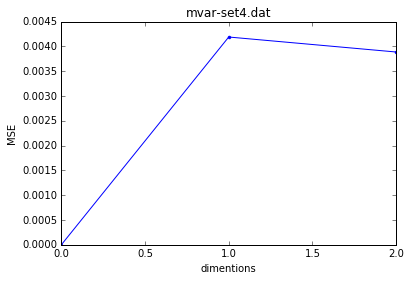

In [24]:
for i in range(1,5):
    fn = "mvar-set"+str(i)+".dat"    
    MultiVar(fn, dim =2)

    



#### From the forms above, when mapping x to high dimension, all values of linear model MSE are similar. 
#### Consider with over fitting and stability of predictions, we could find that the best linear model is when factor = 1. 